<a href="https://colab.research.google.com/github/BrennoBarbosaDev/pipelineETL-Python/blob/main/Pipeline_de_etl_bandeiras_de_cart%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extract

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# func extract
def extract_data(file_path):
    df = pd.read_csv(file_path)
    return df

input_file = "cards.csv"
data = extract_data(input_file)


### Transform

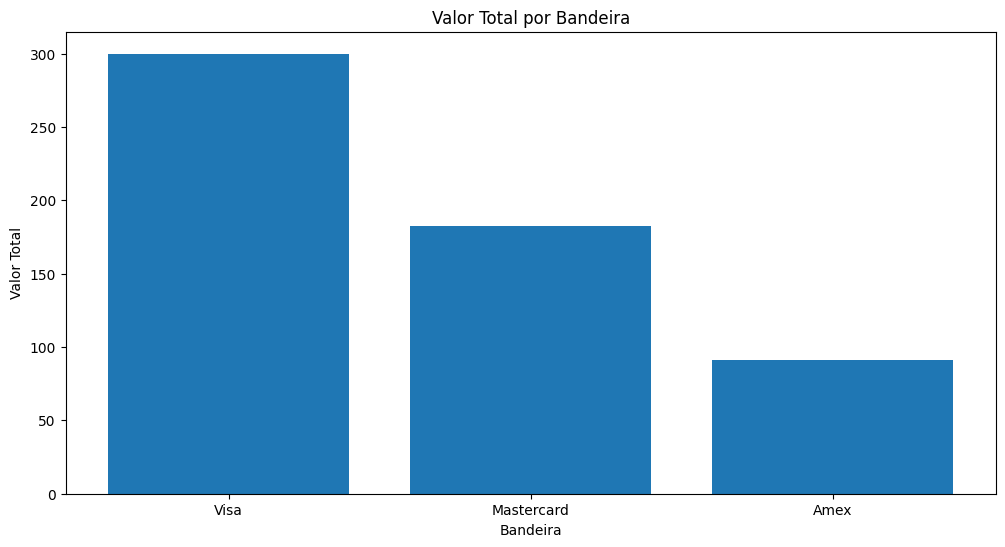

In [13]:
# func de transform
def transform_data(dataframe):
    # verifica e removo duplicadas
    dataframe = dataframe.drop_duplicates()

    # preencher valores nulos
    dataframe['Quantidade'].fillna(0, inplace=True)

    # converter a coluna 'Data' para datetime
    dataframe['Data'] = pd.to_datetime(dataframe['Data'])

    # filtro de vendas
    dataframe = dataframe[dataframe['Data'].dt.month == 9]

    # valor total
    dataframe['Valor Total'] = dataframe['Venda'] * dataframe['Quantidade']

    # cria uma coluna para categorizar vendas como "Alta" ou "Baixa"
    dataframe['Categoria'] = dataframe['Valor Total'].apply(lambda x: 'Alta' if x > 50 else 'Baixa')

    return dataframe

# visualização grafica
plt.figure(figsize=(12, 6))
plt.bar(transformed_data['Bandeira'], transformed_data['Valor Total'])
plt.xlabel('Bandeira')
plt.ylabel('Valor Total')
plt.title('Valor Total por Bandeira')
plt.show()


In [14]:
# func para calculo da media por bandeira
def calcular_media_vendas_por_bandeira(dataframe):

    media_vendas_por_bandeira = dataframe.groupby('Bandeira')['Venda'].mean().reset_index()
    return media_vendas_por_bandeira


Média das vendas por bandeira:
     Bandeira   Venda
0        Amex  45.750
1  Mastercard  68.125
2        Visa  60.250


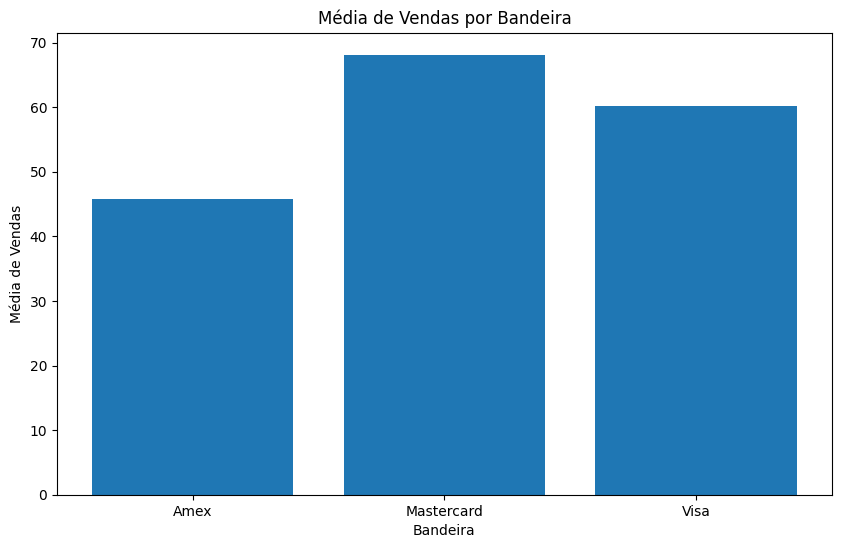

In [16]:
# verifica transformação dos dados
transformed_data = transform_data(data)

# calcula a media por bandeira
media_vendas = calcular_media_vendas_por_bandeira(transformed_data)

print("Média das vendas por bandeira:")
print(media_vendas)

# visualização grafica
plt.figure(figsize=(10, 6))
plt.bar(media_vendas['Bandeira'], media_vendas['Venda'])
plt.xlabel('Bandeira')
plt.ylabel('Média de Vendas')
plt.title('Média de Vendas por Bandeira')
plt.show()


### Load

In [15]:
# Func load
def load_data(dataframe, output_file):
    dataframe.to_csv(output_file, index=False)

# arquivo de saida
output_file = "cards_transformadas.csv"
load_data(transformed_data, output_file)

print("O pipeline foi concluido com sucesso! ☺")


O pipeline foi concluido com sucesso! ☺
